In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dict_dtype = {'Item_Number':str,
'Bottle_Volume (ml)':int,
'Bottles_Sold':int,
'Bottle_Retail':float,
'Store_Number':int}

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
pdtypes = {'Item Number':str,'Vendor':str}

In [6]:
# products_iowa = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\Iowa_Liquor_Products(1).csv',dtype=pdtypes)

In [7]:
products = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\clustering_data_num_unique_stores.csv',dtype=dict_dtype, index_col=0)

In [8]:
products.rename({'Store_Number':'Num_Stores_Selling', 'Sales':'revenue'} ,axis=1, inplace=True)
              

In [9]:
check = products['revenue'].sum()
print(check)

424233229.6


In [10]:
products2 = products.copy()

In [11]:
#remove minis seliing for over $10 due to data quality issues see data quality check notebook
poor_quality = products2.loc[(products.Bottle_Volume == 50) & (products.Bottle_Retail > 10)]
poor_quality.shape

(159, 8)

In [12]:

(products.Bottle_Volume == 50) & (products.Bottle_Retail > 10)

0       False
1       False
2       False
3       False
4       False
        ...  
4470    False
4471    False
4472    False
4473    False
4474    False
Length: 4475, dtype: bool

In [13]:
poor_quality_mask = (products.Bottle_Volume == 50) & (products.Bottle_Retail > 10)
type(poor_quality_mask)

pandas.core.series.Series

In [14]:
products2 = products2[~poor_quality_mask]

In [15]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4316 entries, 0 to 4474
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4316 non-null   object 
 1   Item_Description    4316 non-null   object 
 2   Bottle_Volume       4316 non-null   int64  
 3   New_Category_Name   4316 non-null   object 
 4   Bottle_Retail       4316 non-null   float64
 5   Bottles_Sold        4316 non-null   int32  
 6   Num_Stores_Selling  4316 non-null   int32  
 7   revenue             4316 non-null   float64
dtypes: float64(2), int32(2), int64(1), object(3)
memory usage: 269.8+ KB


In [16]:
products.describe()

,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue
count,4475.000000,4475.000000,4.475000e+03,4475.000000,4.475000e+03
mean,792.361564,31.221806,6.930340e+03,125.248045,9.480072e+04
std,410.724957,69.350753,3.972229e+04,214.229508,3.889196e+05
min,20.000000,0.990000,1.000000e+00,1.000000,7.500000e+00
25%,750.000000,11.799501,5.250000e+01,3.000000,1.395540e+03
50%,750.000000,20.250000,5.470000e+02,49.000000,1.304100e+04
75%,750.000000,35.000000,3.622000e+03,154.000000,5.269973e+04
max,5250.000000,2963.694000,2.105088e+06,1725.000000,1.062280e+07


In [17]:
products.shape

(4475, 8)

<AxesSubplot:xlabel='Bottle_Retail', ylabel='Count'>

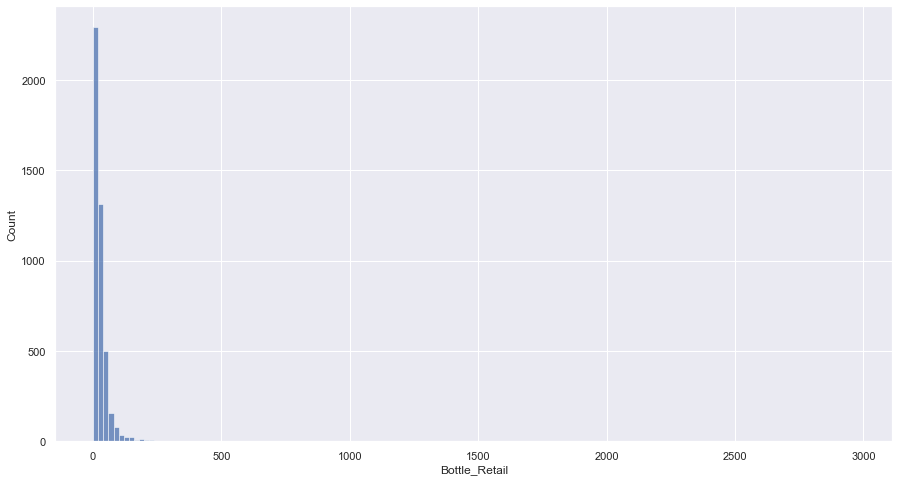

In [18]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(products['Bottle_Retail'], bins=150)


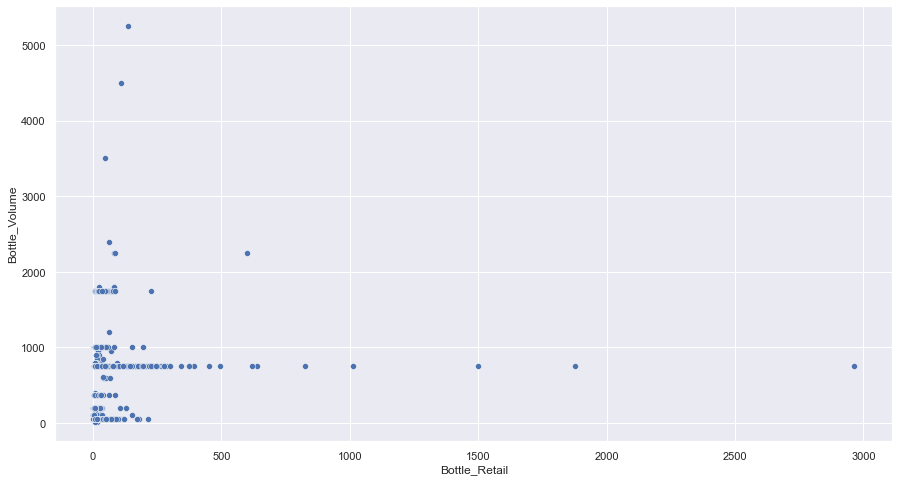

In [19]:
# products.plot.scatter(x='Bottle_Volume', y='Bottle_Retail')
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottle_Volume')
# gfg.set_ylim(0, 80)
# gph.set_xlim(0.98,3000)
# gph.set_xticks(range(0.98,3000))
plt.show()

In [20]:
products.Bottle_Retail.corr((products.Bottle_Volume))

0.012858551897243728

In [21]:
products.Bottle_Retail.corr((products.Bottles_Sold))

-0.04408941079679311

In [22]:
products.Bottles_Sold.corr((products.Bottle_Volume))

-0.000152168220141047

In [23]:
products.Bottles_Sold.corr((products.Num_Stores_Selling))

0.45378226327407434

In [24]:
filt = products.Bottle_Retail > 1400
products[filt]

,Item_Number,Item_Description,Bottle_Volume,New_Category_Name,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue
1636,48725,Remy Martin Louis XIII,750,Brandies,2963.694,17,12,50977.11
3330,917673,HA Double Eagle Very Rare,750,Bourbon,1500.000,2,2,3000.00
3367,919976,HA OFC Bourbon 1995,750,Bourbon,1875.000,10,10,18750.00


In [25]:
filt2 = products.Bottle_Volume > 3000
products[filt2]

,Item_Number,Item_Description,Bottle_Volume,New_Category_Name,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue
0,100015,Fireball Cinnamon Whiskey Bag in Box,3500,Liquers,45.0,1123,129,50535.0
139,101515,Fireball Cinnamon Whiskey Keg,5250,Temporary & Specialty Packages,138.0,180,141,24895.5
155,101665,Stumpys Spirits Cocktail Collection Gift Set,4500,Temporary & Specialty Packages,108.0,115,26,12420.0


In [26]:
np.sum(products.Bottles_Sold)

31013272

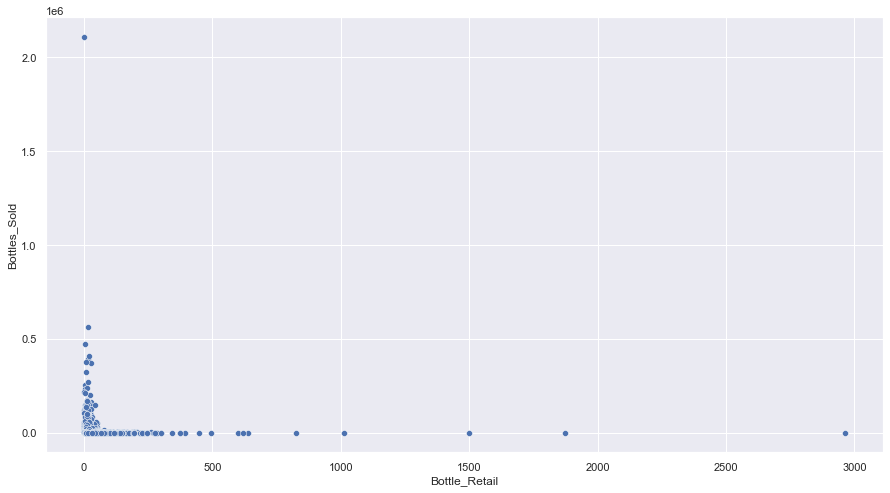

In [27]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottles_Sold')
# gfg.set_ylim(0, 80)

remove outliers

In [28]:
# filt = products2.Bottle_Retail > 1400 #drop outliers of Bottle Retail
filt = products2.Bottle_Retail > 750 #drop outliers of Bottle Retail

In [29]:
products2[filt]

,Item_Number,Item_Description,Bottle_Volume,New_Category_Name,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue
1338,4113,Hennessy Paradis,750,Brandies,824.990,27,15,22274.73
1636,48725,Remy Martin Louis XIII,750,Brandies,2963.694,17,12,50977.11
3194,906532,Glengoyne 30 YO,750,Scotch,1012.500,1,1,1012.50
3330,917673,HA Double Eagle Very Rare,750,Bourbon,1500.000,2,2,3000.00
3367,919976,HA OFC Bourbon 1995,750,Bourbon,1875.000,10,10,18750.00


In [30]:

products2 = products2[~filt]

In [31]:
products2.shape

(4311, 8)

In [32]:
filt2 = products2.Bottle_Volume > 3000 #drop outliers of Bottle Volume

In [33]:
products2 = products2[~filt2] 

In [34]:
products2.shape

(4308, 8)

In [35]:
filt3= products2.Item_Number == '64870'  #outlier of bottles sold

In [36]:
products2[filt3]

,Item_Number,Item_Description,Bottle_Volume,New_Category_Name,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue
2035,64870,Fireball Cinnamon Whiskey,100,Liquers,1.35,2105088,893,2841868.8


In [37]:
# products2[filt3]


products2 = products2[~filt3]

## write out products2

In [38]:
products2.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\products2_outliers_removed.csv')

## scale data for clustering

In [39]:
products2.shape

(4307, 8)

In [40]:
# cols_to_scale = ['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']

In [41]:
scaler = StandardScaler()

In [42]:


products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]] = scaler.fit_transform\
                                           (products2[['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']])
                                                   

products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled']].describe()

,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled
count,4.307000e+03,4.307000e+03,4.307000e+03
mean,2.295406e-15,3.563437e-16,-1.609011e-16
std,1.000116e+00,1.000116e+00,1.000116e+00
min,-2.096811e+00,-7.828258e-01,-2.662160e-01
25%,-1.773588e-01,-4.922694e-01,-2.640761e-01
50%,-1.773588e-01,-2.451894e-01,-2.430812e-01
75%,-1.773588e-01,1.474533e-01,-1.158397e-01
max,4.161130e+00,1.699185e+01,2.247531e+01


In [43]:
# model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


determine optimal number of clusters

In [44]:
from sklearn.metrics import silhouette_score

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]

df_scaled = products2[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.6402616619432038
number of clusters =  3   silhouette score =  0.6293705991614129
number of clusters =  4   silhouette score =  0.6578331681724466
number of clusters =  5   silhouette score =  0.5818767757961989
number of clusters =  6   silhouette score =  0.5937353032583028
number of clusters =  7   silhouette score =  0.5688255400179291
number of clusters =  8   silhouette score =  0.5342460550903364
number of clusters =  9   silhouette score =  0.5524517637234547
number of clusters =  10   silhouette score =  0.5103762404785563


In [45]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

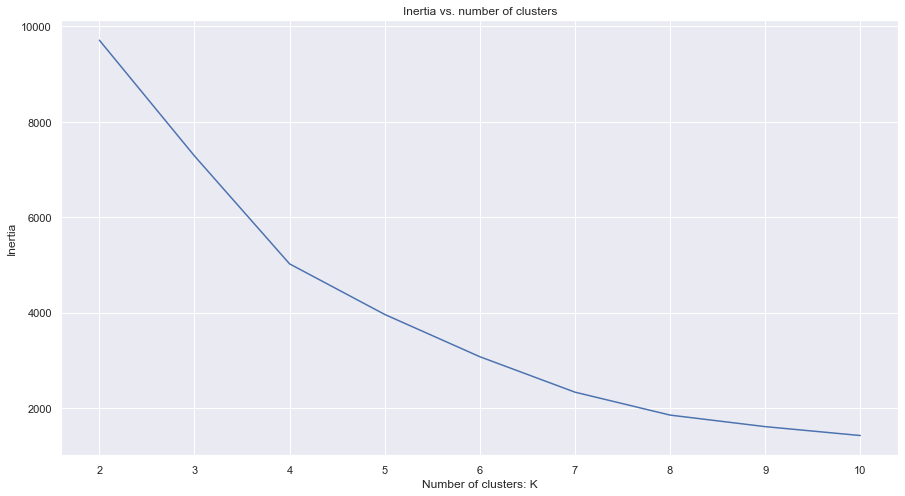

In [46]:

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

In [47]:
# stop

get four clusters

In [48]:


cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


model = KMeans(n_clusters=7, random_state=42)

model.fit(products2[cluster_cols])

products2['product_cluster'] = model.predict(products2[cluster_cols])

In [49]:
products2.head()

,Item_Number,Item_Description,Bottle_Volume,New_Category_Name,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,product_cluster
1,10006,Scoresby Rare Scotch,750,Scotch,7.70,4619,197,35566.30,-0.177359,-0.595421,-0.079765,2
2,100077,Kraken Rum w/ Tiki Glass,750,Temporary & Specialty Packages,15.68,2679,136,42006.72,-0.177359,-0.372546,-0.158092,2
3,10008,Scoresby Rare Scotch,1750,Scotch,15.75,12340,287,194355.00,2.452028,-0.370591,0.231970,4
4,10009,Scoresby Rare Scotch,1000,Scotch,10.11,1722,70,17409.42,0.479988,-0.528112,-0.196731,2
5,100148,Jack Daniels Single Barrel w/Snifter Glass,750,Temporary & Specialty Packages,41.39,606,120,25082.34,-0.177359,0.345512,-0.241789,2


In [50]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4307 entries, 1 to 4474
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Number           4307 non-null   object 
 1   Item_Description      4307 non-null   object 
 2   Bottle_Volume         4307 non-null   int64  
 3   New_Category_Name     4307 non-null   object 
 4   Bottle_Retail         4307 non-null   float64
 5   Bottles_Sold          4307 non-null   int32  
 6   Num_Stores_Selling    4307 non-null   int32  
 7   revenue               4307 non-null   float64
 8   Bottle_Volume_scaled  4307 non-null   float64
 9   Bottle_Retail_scaled  4307 non-null   float64
 10  Bottles_Sold_scaled   4307 non-null   float64
 11  product_cluster       4307 non-null   int32  
dtypes: float64(5), int32(3), int64(1), object(3)
memory usage: 387.0+ KB


In [51]:
products2['Bottle_Volume_liters'] = products2.Bottle_Volume / 1000

# Name Clusters

In [52]:
# prod_dict = {0:'Volume_For_Dollar', 1:'Everything_Else', 2:'Popular_Bottles',3:'High End'}

In [53]:
# products2[['product_cluster']].apply(lambda p: prod_dict[p[0]],axis=1)

Name Product Clusters

In [54]:
# products2['cluster_name'] = products2['product_cluster'].apply(lambda p: prod_dict[p])

In [55]:
# products2.cluster_name

In [56]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4307 entries, 1 to 4474
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Number           4307 non-null   object 
 1   Item_Description      4307 non-null   object 
 2   Bottle_Volume         4307 non-null   int64  
 3   New_Category_Name     4307 non-null   object 
 4   Bottle_Retail         4307 non-null   float64
 5   Bottles_Sold          4307 non-null   int32  
 6   Num_Stores_Selling    4307 non-null   int32  
 7   revenue               4307 non-null   float64
 8   Bottle_Volume_scaled  4307 non-null   float64
 9   Bottle_Retail_scaled  4307 non-null   float64
 10  Bottles_Sold_scaled   4307 non-null   float64
 11  product_cluster       4307 non-null   int32  
 12  Bottle_Volume_liters  4307 non-null   float64
dtypes: float64(6), int32(3), int64(1), object(3)
memory usage: 420.6+ KB


In [57]:
products2.groupby(['product_cluster']).agg({'revenue':'sum','Bottle_Volume' : 'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean' })

,revenue,Bottle_Volume,Bottle_Retail,Bottles_Sold
product_cluster,,,,
0,1.265102e+08,849.462366,13.860230,97888.311828
1,1.339720e+07,746.666667,68.723796,382.618333
2,1.382151e+08,782.338502,20.920519,3220.302950
3,4.843325e+07,868.181818,11.920909,353829.818182
4,6.027459e+07,1754.401806,23.194309,7005.036117
5,9.499739e+05,808.510638,268.558212,91.978723
6,2.342551e+07,214.317697,8.782824,7581.245203


In [58]:
products2.groupby(['product_cluster']).agg({'revenue':'sum','Bottle_Volume' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

revenue Bottle_Volume                            \
                          sum           min   max         std  median   
product_cluster                                                         
0                1.265102e+08           100  1750  443.414654   750.0   
1                1.339720e+07           100  1200   70.023647   750.0   
2                1.382151e+08           600  1000   83.797203   750.0   
3                4.843325e+07            50  1750  634.339313   750.0   
4                6.027459e+07          1750  2400   45.843440  1750.0   
5                9.499739e+05           750  2250  261.749787   750.0   
6                2.342551e+07            20   400  141.557512   200.0   

                             Bottle_Retail                          \
                        mean           min         max         std   
product_cluster                                                      
0                 849.462366          1.34   41.522231    8.452538   
1                 746.666667         44.49  167.010000   26.608148   
2                 782.338502          3.20   44.820661   10.252789   
3                 868.181818          2.70   28.500000    8.061184   
4                1754.401806          7.34   87.247228   15.467342   
5                 808.510638        170.00  637.410000  118.112714   
6                 214.317697          0.99   37.500000    6.050588   

                                        Bottles_Sold                         \
                     median        mean          min     max            std   
product_cluster                                                               
0                 12.066901   13.860230        51190  215797   36989.120693   
1                 59.725000   68.723796            3   12821    1124.376746   
2                 19.490000   20.920519            1   50396    6544.795732   
3                 10.760000   11.920909       230548  563260  104877.517227   
4                 17.250000   23.194309            3   65865   12113.804140   
5                224.990000  268.558212            1    1713     257.314939   
6                  7.500000    8.782824            2   60893   12250.440754   

                                          
                   median           mean  
product_cluster                           
0                 88813.0   97888.311828  
1                    46.5     382.618333  
2                   567.5    3220.302950  
3                372730.0  353829.818182  
4                  1879.0    7005.036117  
5                    18.0      91.978723  
6                  2569.0    7581.245203

In [59]:
products2.groupby(['product_cluster']).agg({'Bottle_Volume_liters' :['min','max', 'mean'], 'Bottle_Retail':['min','max', 'mean'],'Bottles_Sold':['min','max', 'mean'] })

Bottle_Volume_liters                 Bottle_Retail  \
                                 min   max      mean           min   
product_cluster                                                      
0                               0.10  1.75  0.849462          1.34   
1                               0.10  1.20  0.746667         44.49   
2                               0.60  1.00  0.782339          3.20   
3                               0.05  1.75  0.868182          2.70   
4                               1.75  2.40  1.754402          7.34   
5                               0.75  2.25  0.808511        170.00   
6                               0.02  0.40  0.214318          0.99   

                                        Bottles_Sold                         
                        max        mean          min     max           mean  
product_cluster                                                              
0                 41.522231   13.860230        51190  215797   97888.311828  
1                167.010000   68.723796            3   12821     382.618333  
2                 44.820661   20.920519            1   50396    3220.302950  
3                 28.500000   11.920909       230548  563260  353829.818182  
4                 87.247228   23.194309            3   65865    7005.036117  
5                637.410000  268.558212            1    1713      91.978723  
6                 37.500000    8.782824            2   60893    7581.245203

In [60]:
products2['price_per_ml'] = products2['Bottle_Retail'] / products2['Bottle_Volume']

In [61]:
products2.groupby(['product_cluster']).agg({'Bottle_Volume':'nunique'})

,Bottle_Volume
product_cluster,
0,6
1,9
2,8
3,5
4,4
5,4
6,8


In [62]:
products2.groupby(['product_cluster']).agg({'Item_Number':'nunique','revenue':'sum','Bottle_Volume' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

Item_Number       revenue Bottle_Volume                    \
                    nunique           sum           min   max         std   
product_cluster                                                             
0                        93  1.265102e+08           100  1750  443.414654   
1                       600  1.339720e+07           100  1200   70.023647   
2                      2643  1.382151e+08           600  1000   83.797203   
3                        11  4.843325e+07            50  1750  634.339313   
4                       443  6.027459e+07          1750  2400   45.843440   
5                        47  9.499739e+05           750  2250  261.749787   
6                       469  2.342551e+07            20   400  141.557512   

                                     Bottle_Retail                          \
                 median         mean           min         max         std   
product_cluster                                                              
0                 750.0   849.462366          1.34   41.522231    8.452538   
1                 750.0   746.666667         44.49  167.010000   26.608148   
2                 750.0   782.338502          3.20   44.820661   10.252789   
3                 750.0   868.181818          2.70   28.500000    8.061184   
4                1750.0  1754.401806          7.34   87.247228   15.467342   
5                 750.0   808.510638        170.00  637.410000  118.112714   
6                 200.0   214.317697          0.99   37.500000    6.050588   

                                        Bottles_Sold                         \
                     median        mean          min     max            std   
product_cluster                                                               
0                 12.066901   13.860230        51190  215797   36989.120693   
1                 59.725000   68.723796            3   12821    1124.376746   
2                 19.490000   20.920519            1   50396    6544.795732   
3                 10.760000   11.920909       230548  563260  104877.517227   
4                 17.250000   23.194309            3   65865   12113.804140   
5                224.990000  268.558212            1    1713     257.314939   
6                  7.500000    8.782824            2   60893   12250.440754   

                                          
                   median           mean  
product_cluster                           
0                 88813.0   97888.311828  
1                    46.5     382.618333  
2                   567.5    3220.302950  
3                372730.0  353829.818182  
4                  1879.0    7005.036117  
5                    18.0      91.978723  
6                  2569.0    7581.245203

In [63]:
# products2['revenue'] = products2.Bottles_Sold * products2.Bottle_Retail
stop

NameError: name 'stop' is not defined

In [ ]:
df = products2.groupby(['cluster_name']).agg({'revenue':'sum'})
df.style.format("{:.0f}")


In [ ]:
from freq_pd import proc_freq

In [ ]:
proc_freq(products2,'cluster_name')

In [ ]:
products2.groupby(['cluster_name']).agg({'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

In [ ]:
products2.groupby(['cluster_name']).agg({'revenue':['sum'],'Bottle_Volume':['nunique','min','max','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

In [ ]:
products2.groupby(['cluster_name']).agg({'revenue':['sum'],'Bottle_Volume':['nunique','min','max','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

In [ ]:
pd.set_option('display.max_columns', None)
products2.groupby(['cluster_name']).agg({'Item_Number':['nunique'],'revenue':['sum'],'Bottle_Volume':['count','nunique','min','max','median','std'],'Bottle_Retail':['min','max','std', 'median', 'mean'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

In [ ]:
products2.cluster_name.value_counts()

In [ ]:
# df.sort_values(by=['Population'], ascending=False)
products2.sort_values(by=['revenue'], ascending=False)
products2[['cluster_name','revenue','Item_Description','Bottle_Retail','Bottle_Volume']].sort_values(by=['revenue'], ascending=False)
# products2.style.format("{:.0f}")


In [ ]:
products2.loc[products2.product_cluster==3,:]['Bottle_Retail'].max()

In [ ]:
# products2.loc[products2.product_cluster==1,:]

In [ ]:
products_out=products2[['Item_Number','Item_Description','Bottle_Volume','Bottle_Retail', 'Bottles_Sold','cluster_name','revenue','Num_Stores_Selling','New_Category_Name']]

In [ ]:
products['revenue'].sum()

In [ ]:
check

In [ ]:
products_out.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\product_clusters.csv')